In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Load Train Data

In [2]:
# load training data
train_data = pd.read_csv('E:/Dataset/digitsnpixels.csv')

# Exploratory Data Analysis

In [3]:
print(f'There are {train_data.shape[0]} rows and {train_data.shape[1]} columns')

There are 42000 rows and 785 columns


In [4]:
train_data.head(20)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Separate features X (independent variables) and target/label y (dependent variable)
X = train_data.values[:, 1:]
y = train_data.values[:, 0]

In [6]:
# the value range of X
X.min(), X.max()

(0, 255)

In [7]:
# the array shape of a single data (image)
X[0].shape

(784,)

In [8]:
np.sqrt(784)

28.0

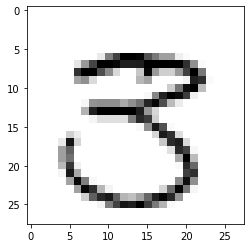

In [9]:
# reshape the image data into 2D array, and plot the image
plt.imshow(X[7].reshape(28,28), cmap=plt.cm.binary);

In [10]:
# show the label of the corresponding image
y[7]

3

C:\Users\Praparna\AppData\Local\conda\conda\envs\MYENV_DEEP_LEARNING\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


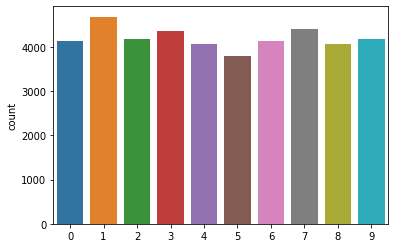

In [11]:
# count and show the number of data for each label/target y
sns.countplot(y);

# Data Preprocessing

In [12]:
# normalizing features (pixels)
X = X / 255.0

In [13]:
# one-hot-encoding target (digit 0-9)
y = tf.keras.utils.to_categorical(y)

In [14]:
#This function returns a matrix of binary values (either ‘1’ or ‘0’).
#It has number of rows equal to the length of the input vector and number of columns equal to the number of classes.

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# create train and validation data

from sklearn.model_selection import train_test_split

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2)

In [17]:
# reshape data to fit Keras's input configuration (rank 4 tensor: (rows, pixel, pixel, channel))

X_tr = X_tr.reshape(X_tr.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [18]:
X_tr.shape

(33600, 28, 28, 1)

# Build CNN Model

In [19]:
# build the frame
model = tf.keras.Sequential()

In [20]:
# add the first convolution layer
model.add(tf.keras.layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (28, 28, 1)))

In [21]:
#How much u wish to read and recognize for maxpooling

In [22]:
# add the first pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [23]:
# add regularization
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

In [24]:
# add the second convolution layer
model.add(tf.keras.layers.Convolution2D(filters = 16, kernel_size = (3,3), activation = 'relu'))

In [25]:
# add the second pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [26]:
# add regularization
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.4))

In [27]:
# flatten the array (from 2D to 1D)
model.add(tf.keras.layers.Flatten())

In [28]:
# add the first fully-connected-layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [29]:
# add the second fully-connected-layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [30]:
# add the output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [31]:
# compile the model
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
# show the network architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 16)          6

# Train Model

In [33]:
# define early stopping
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [34]:
# fit the model and save the information in history
history = model.fit(
   X_tr,
   y_tr,
   batch_size = 64,
   epochs = 100,
   validation_data = (X_val, y_val),
   callbacks = [callback])

Epoch 1/100
525/525 [==============================] - 22s 42ms/step - loss: 0.3615 - accuracy: 0.8835 - val_loss: 0.2180 - val_accuracy: 0.9338
Epoch 2/100
525/525 [==============================] - 21s 40ms/step - loss: 0.1374 - accuracy: 0.9555 - val_loss: 0.0596 - val_accuracy: 0.9798
Epoch 3/100
525/525 [==============================] - 21s 40ms/step - loss: 0.1014 - accuracy: 0.9677 - val_loss: 0.0655 - val_accuracy: 0.9786
Epoch 4/100
525/525 [==============================] - 21s 40ms/step - loss: 0.0881 - accuracy: 0.9711 - val_loss: 0.0412 - val_accuracy: 0.9868
Epoch 5/100
525/525 [==============================] - 21s 40ms/step - loss: 0.0796 - accuracy: 0.9745 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 6/100
525/525 [==============================] - 21s 40ms/step - loss: 0.0741 - accuracy: 0.9758 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 7/100
525/525 [==============================] - 21s 40ms/step - loss: 0.0658 - accuracy: 0.9787 - val_loss: 0.0317 - val_ac

# Evaluation on Validation Data

In [35]:
results = model.evaluate(X_val, y_val, batch_size=64)
print(f"valid loss: {results[0]}, valid acc: {round(results[1]*100,2)}%")

132/132 [==============================] - 1s 10ms/step - loss: 0.0341 - accuracy: 0.9882
valid loss: 0.03413257747888565, valid acc: 98.82%


In [36]:
# get probabilities
probabilities = model.predict(X_val)

In [37]:
# get the prediction class
y_pred = np.argmax(probabilities, axis=1)

In [38]:
y_pred

array([9, 0, 6, ..., 2, 9, 1], dtype=int64)

In [39]:
# pick random data
idx = np.random.randint(0, X_val.shape[0], 32)

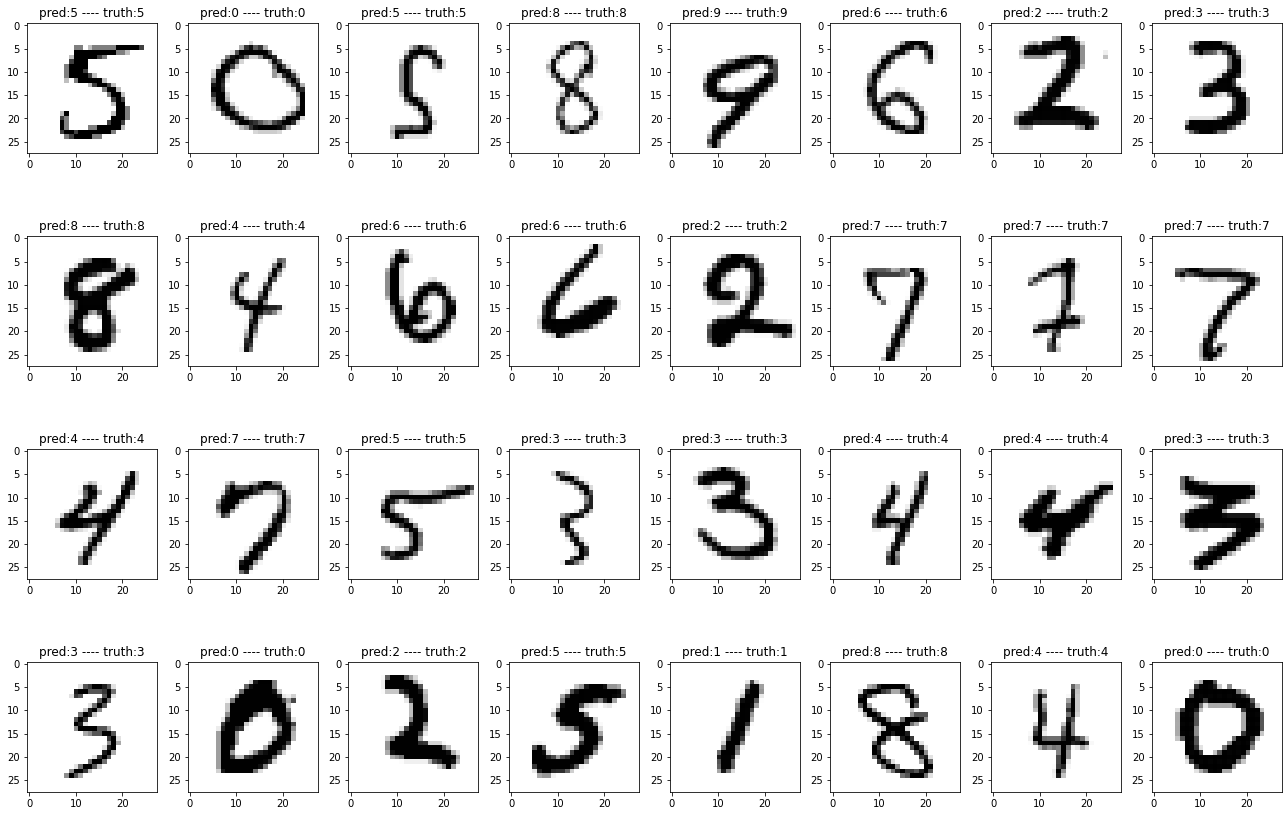

In [40]:
fig, ax = plt.subplots(4, 8, figsize=(18,12))
k = 0
for i in range(4):
   for j in range(8):
       x = X_val[idx[k]]
       y = np.argmax(y_val[idx[k]])
       ypred = y_pred[idx[k]]
       ax[i,j].imshow(x.reshape(28,28), cmap = plt.cm.binary)
       ax[i,j].set_title(f'pred:{ypred} ---- truth:{y}')
       k += 1    
plt.tight_layout()